In [ ]:
# import library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# data wrangling
# gathering data

In [9]:
df1 = pd.read_csv('E:\INDOSAT - DCODING\Bike-sharing-dataset\hour.csv')
df2 = pd.read_csv('E:\INDOSAT - DCODING\Bike-sharing-dataset\day.csv')

df = pd.concat([df1,df2], ignore_index=True)
df

instant      dteday  season  yr  mnth   hr  holiday  weekday  \
0            1  2011-01-01       1   0     1  0.0        0        6   
1            2  2011-01-01       1   0     1  1.0        0        6   
2            3  2011-01-01       1   0     1  2.0        0        6   
3            4  2011-01-01       1   0     1  3.0        0        6   
4            5  2011-01-01       1   0     1  4.0        0        6   
...        ...         ...     ...  ..   ...  ...      ...      ...   
18105      727  2012-12-27       1   1    12  NaN        0        4   
18106      728  2012-12-28       1   1    12  NaN        0        5   
18107      729  2012-12-29       1   1    12  NaN        0        6   
18108      730  2012-12-30       1   1    12  NaN        0        0   
18109      731  2012-12-31       1   1    12  NaN        0        1   

       workingday  weathersit      temp     atemp       hum  windspeed  \
0               0           1  0.240000  0.287900  0.810000   0.000000   
1               0           1  0.220000  0.272700  0.800000   0.000000   
2               0           1  0.220000  0.272700  0.800000   0.000000   
3               0           1  0.240000  0.287900  0.750000   0.000000   
4               0           1  0.240000  0.287900  0.750000   0.000000   
...           ...         ...       ...       ...       ...        ...   
18105           1           2  0.254167  0.226642  0.652917   0.350133   
18106           1           2  0.253333  0.255046  0.590000   0.155471   
18107           0           2  0.253333  0.242400  0.752917   0.124383   
18108           0           1  0.255833  0.231700  0.483333   0.350754   
18109           1           2  0.215833  0.223487  0.577500   0.154846   

       casual  registered   cnt  
0           3          13    16  
1           8          32    40  
2           5          27    32  
3           3          10    13  
4           0           1     1  
...       ...         ...   ...  
18105     247        1867  2114  
18106     644        2451  3095  
18107     159        1182  1341  
18108     364        1432  1796  
18109     439        2290  2729  

[18110 rows x 17 columns]

In [10]:
# assesing data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [12]:
df.describe()

instant        season            yr          mnth            hr  \
count  18110.000000  18110.000000  18110.000000  18110.000000  17379.000000   
mean    8354.006405      2.501436      0.502485      6.537051     11.546752   
std     5180.771860      1.107045      0.500008      3.439213      6.914405   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      6.000000   
50%     8324.500000      3.000000      1.000000      7.000000     12.000000   
75%    12851.750000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       0.028769      3.003424      0.682772      1.424075      0.496922   
std        0.167160      2.005677      0.465410      0.635830      0.192177   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       0.475718      0.627256      0.190113     68.472336    295.158697   
std        0.171496      0.191147      0.120851    216.588054    771.555142   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     37.000000   
50%        0.484800      0.630000      0.188951     18.000000    123.000000   
75%        0.621200      0.780000      0.253700     55.000000    238.000000   
max        1.000000      1.000000      0.850700   3410.000000   6946.000000   

                cnt  
count  18110.000000  
mean     363.631033  
std      950.827954  
min        1.000000  
25%       43.000000  
50%      152.000000  
75%      305.000000  
max     8714.000000

In [14]:
df.shape

(18110, 17)

In [15]:
# menghitung jumlh nilai null
df.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [16]:
# Melihat nilai unik pada setiap kolom untuk mendapatkan pemahaman
# tentang kategori atau klasifikasi data.
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

instant: 17379 unique values
dteday: 731 unique values
season: 4 unique values
yr: 2 unique values
mnth: 12 unique values
hr: 24 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weathersit: 4 unique values
temp: 528 unique values
atemp: 752 unique values
hum: 651 unique values
windspeed: 679 unique values
casual: 783 unique values
registered: 1440 unique values
cnt: 1552 unique values


In [17]:
# Menampilkan korelasi antar kolom numerik.
df.corr()

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.376402  0.806448  0.455668 -0.004775  0.013725   
season      0.376402  1.000000 -0.010382  0.830429 -0.006117 -0.009623   
yr          0.806448 -0.010382  1.000000 -0.010121 -0.003867  0.006743   
mnth        0.455668  0.830429 -0.010121  1.000000 -0.005772  0.018461   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.013725 -0.009623  0.006743  0.018461  0.000479  1.000000   
weekday     0.001460 -0.002365 -0.004524  0.010365 -0.003498 -0.102083   
workingday -0.003352  0.013692 -0.002189 -0.003576  0.002285 -0.252494   
weathersit -0.010367 -0.013339 -0.020163  0.006728 -0.020203 -0.017635   
temp        0.127555  0.312868  0.041170  0.202395  0.137603 -0.027386   
atemp       0.128904  0.320265  0.039485  0.208829  0.133750 -0.031030   
hum         0.008786  0.152067 -0.084248  0.165924 -0.276498 -0.010735   
windspeed  -0.070409 -0.151422 -0.008796 -0.136889  0.137252  0.004037   
casual     -0.198562  0.052572  0.062429  0.029972  0.301202  0.013794   
registered -0.228920  0.065660  0.095572  0.046111  0.374141 -0.017822   
cnt        -0.230989  0.065255  0.091773  0.044245  0.394071 -0.011320   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.001460   -0.003352   -0.010367  0.127555  0.128904  0.008786   
season     -0.002365    0.013692   -0.013339  0.312868  0.320265  0.152067   
yr         -0.004524   -0.002189   -0.020163  0.041170  0.039485 -0.084248   
mnth        0.010365   -0.003576    0.006728  0.202395  0.208829  0.165924   
hr         -0.003498    0.002285   -0.020203  0.137603  0.133750 -0.276498   
holiday    -0.102083   -0.252494   -0.017635 -0.027386 -0.031030 -0.010735   
weekday     1.000000    0.035948    0.004274 -0.001731 -0.008770 -0.037561   
workingday  0.035948    1.000000    0.045217  0.055282  0.054568  0.015926   
weathersit  0.004274    0.045217    1.000000 -0.103192 -0.106050  0.422449   
temp       -0.001731    0.055282   -0.103192  1.000000  0.987819 -0.064188   
atemp      -0.008770    0.054568   -0.106050  0.987819  1.000000 -0.046396   
hum        -0.037561    0.015926    0.422449 -0.064188 -0.046396  1.000000   
windspeed   0.011542   -0.011978    0.026488 -0.026400 -0.065194 -0.289238   
casual      0.014338   -0.131526   -0.067458  0.165524  0.164240 -0.083344   
registered  0.008174    0.050534   -0.049368  0.103722  0.103431 -0.056971   
cnt         0.009899    0.011046   -0.055426  0.121870  0.121342 -0.065214   

            windspeed    casual  registered       cnt  
instant     -0.070409 -0.198562   -0.228920 -0.230989  
season      -0.151422  0.052572    0.065660  0.065255  
yr          -0.008796  0.062429    0.095572  0.091773  
mnth        -0.136889  0.029972    0.046111  0.044245  
hr           0.137252  0.301202    0.374141  0.394071  
holiday      0.004037  0.013794   -0.017822 -0.011320  
weekday      0.011542  0.014338    0.008174  0.009899  
workingday  -0.011978 -0.131526    0.050534  0.011046  
weathersit   0.026488 -0.067458   -0.049368 -0.055426  
temp        -0.026400  0.165524    0.103722  0.121870  
atemp       -0.065194  0.164240    0.103431  0.121342  
hum         -0.289238 -0.083344   -0.056971 -0.065214  
windspeed    1.000000  0.006698    0.004886  0.005491  
casual       0.006698  1.000000    0.783516  0.863578  
registered   0.004886  0.783516    1.000000  0.989932  
cnt          0.005491  0.863578    0.989932  1.000000

In [18]:
# cleaning data

In [20]:
# Menjelajahi kerangka data, mengidentifikasi Potensi Kesalahan,
# dan memahami tipe data
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:18110
Columns:17
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant      dteday  season  yr  mnth   hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1  0.0        0        6           

In [21]:
# Memeriksa ouliers dalam varibale target "cnt"
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
# Mengidentifikasi outlier
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [24]:
# menghapus outlier
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]
print("shape after outliers removal :",df.shape)

shape after outliers removal : (17063, 17)


In [25]:
# mengubah variabel diskrit "musim" menjadi tempat sampah
df = pd.get_dummies(df, columns=['season'], dtype=int)
df.head()

instant      dteday  yr  mnth   hr  holiday  weekday  workingday  \
0        1  2011-01-01   0     1  0.0        0        6           0   
1        2  2011-01-01   0     1  1.0        0        6           0   
2        3  2011-01-01   0     1  2.0        0        6           0   
3        4  2011-01-01   0     1  3.0        0        6           0   
4        5  2011-01-01   0     1  4.0        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   season_1  season_2  season_3  season_4  
0         1         0         0         0  
1         1         0         0         0  
2         1         0         0         0  
3         1         0         0         0  
4         1         0         0         0

In [26]:
# exploratory data analysis

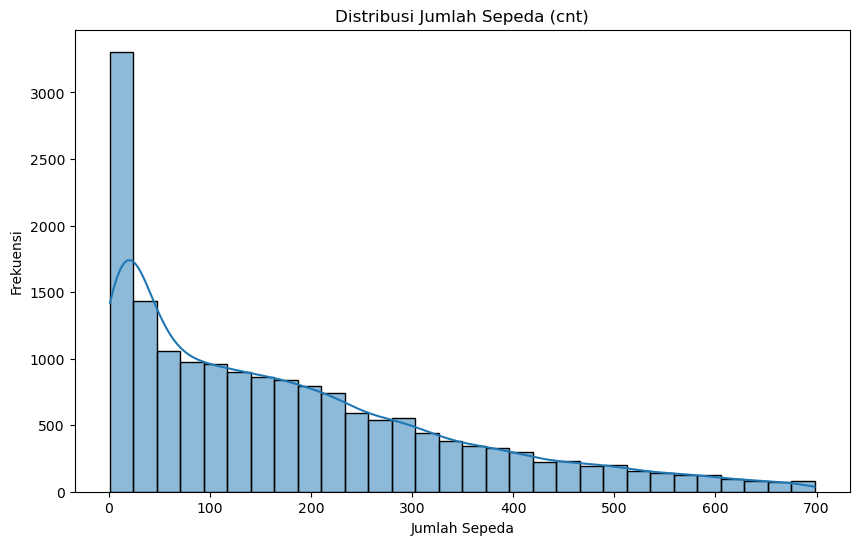

In [27]:
# Histogram untuk variabel target 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda (cnt)')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.show()

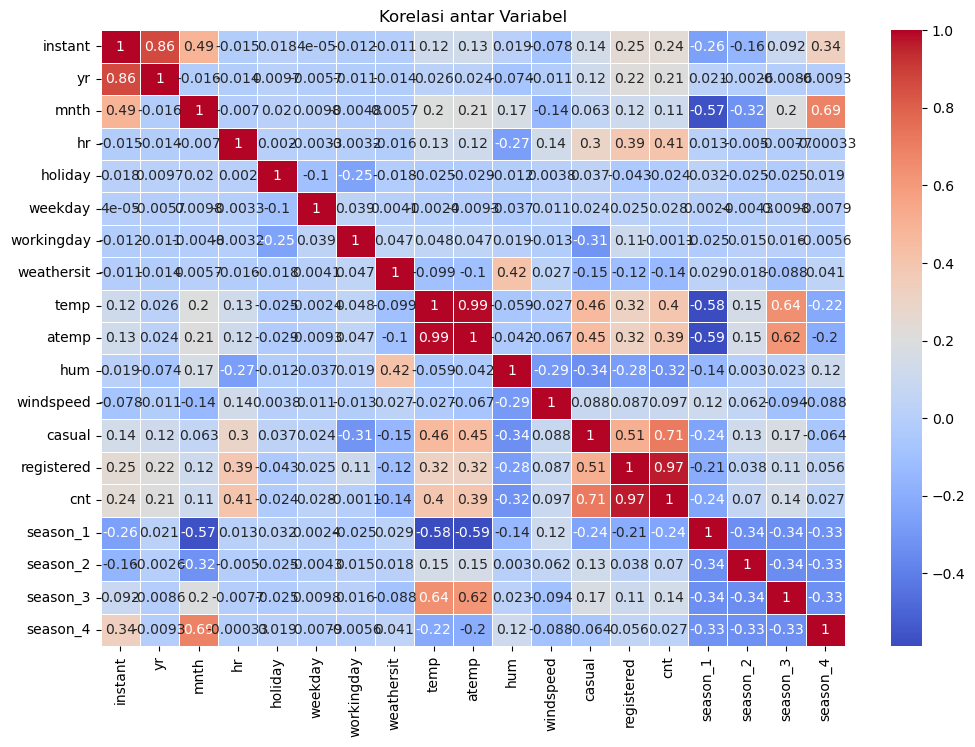

In [28]:
# Korelasi antar variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel')
plt.show()

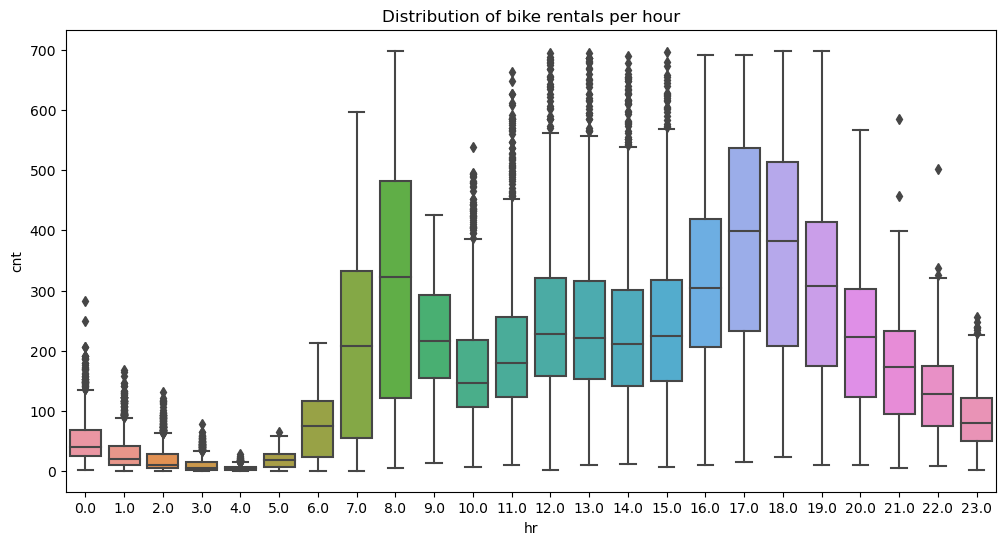

In [29]:
# Boxplot untuk variabel kategorikal 'jam' terhadap 'cnt'
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

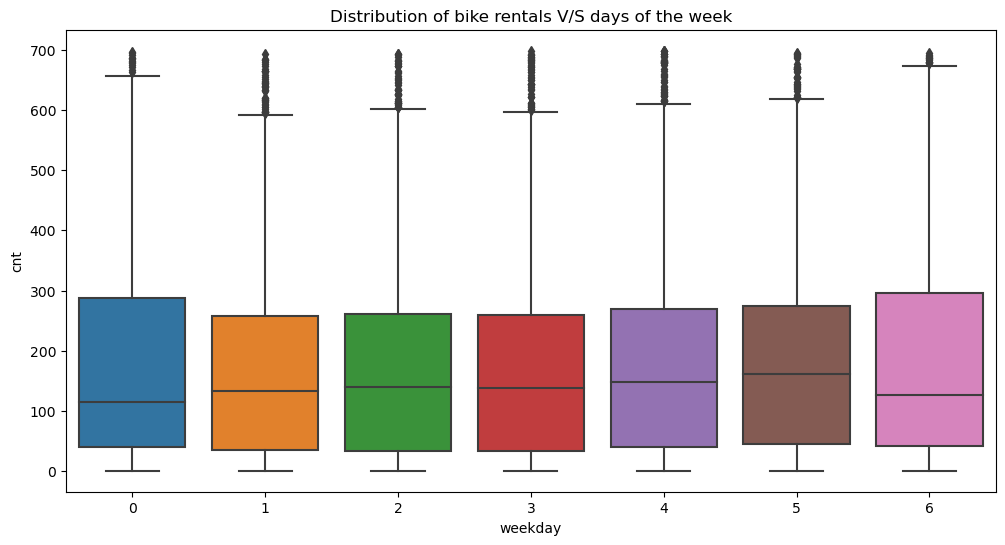

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S days of the week')

<Figure size 1200x600 with 0 Axes>

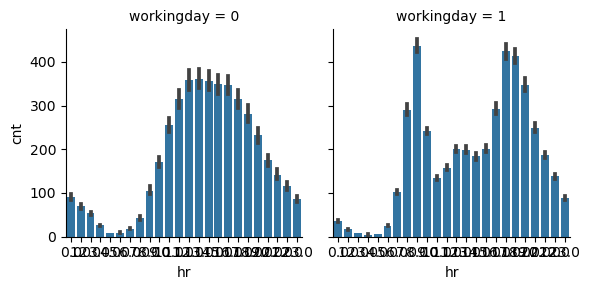

In [31]:
plt.figure(figsize=(12,6))
d = sns.FacetGrid(df, col="workingday")
d. map(sns.barplot, "hr", "cnt")

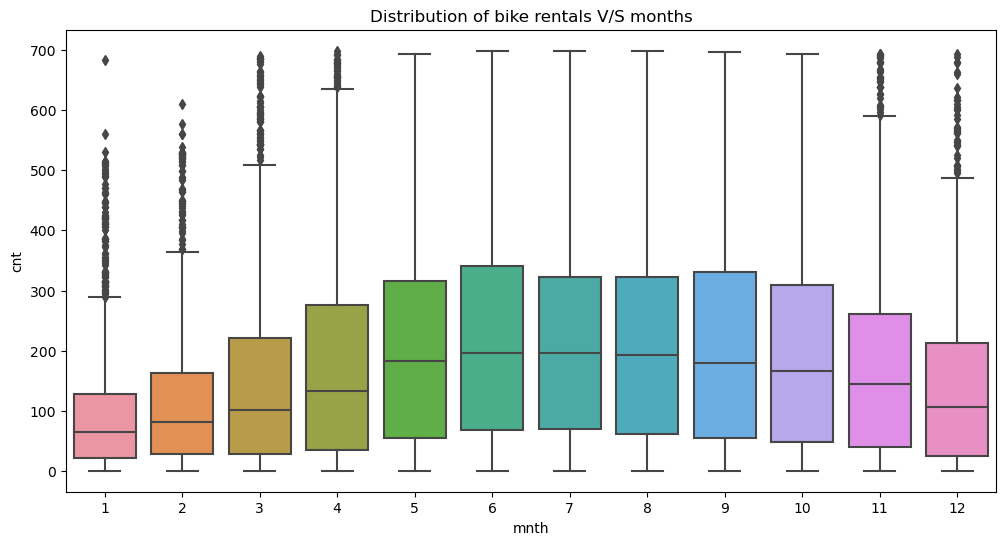

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S months')
plt.show()

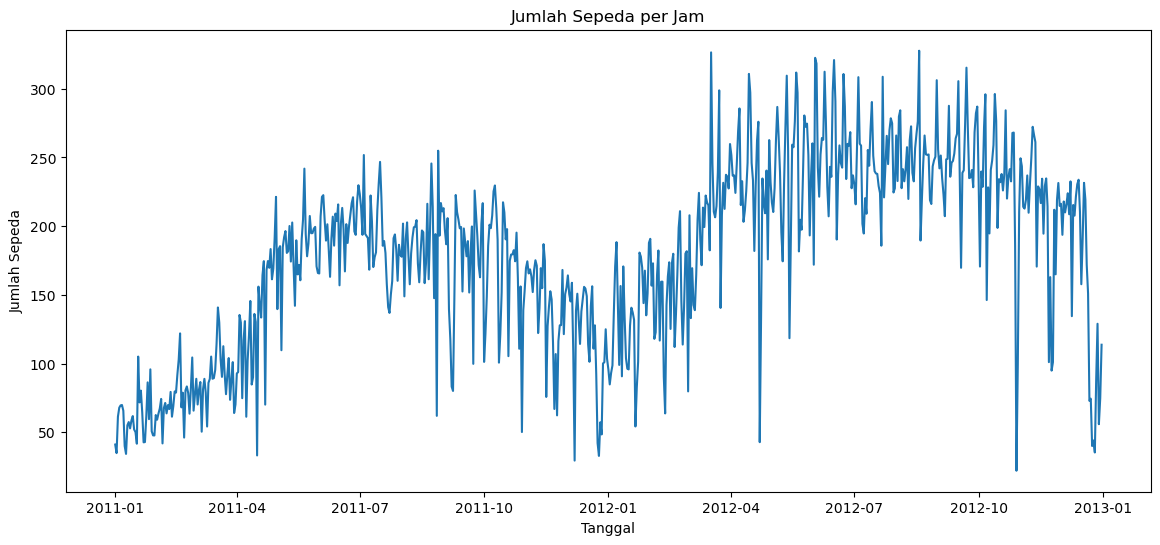

In [33]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Line plot untuk jumlah sepeda per jam
plt.figure(figsize=(14, 6))
sns.lineplot(x='dteday', y='cnt', data=df, ci=None)
plt.title('Jumlah Sepeda per Jam')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.show()

In [34]:
# visualization and explanatory analysis

In [35]:
# Mengelompokkan data per tanggal dan menghitung jumlah sepeda
daily_counts = df.groupby(df['dteday'].dt.date)['cnt'].sum()

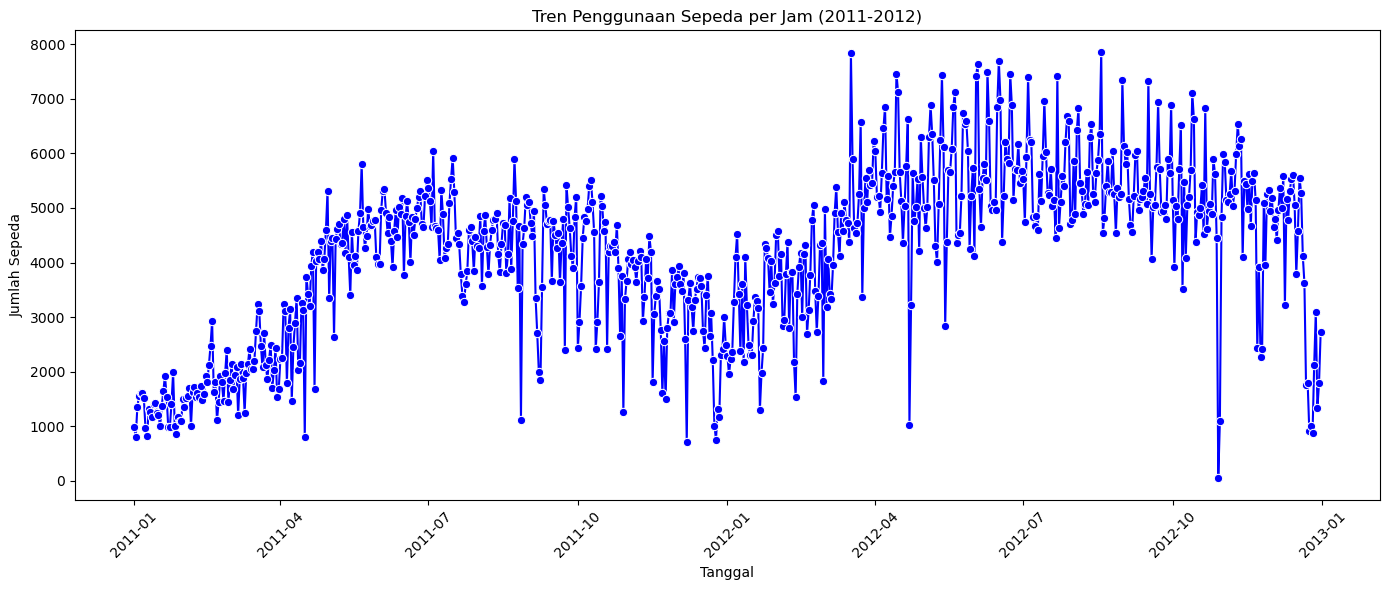

In [36]:
# Line plot untuk tren penggunaan sepeda per jam dari tahun 2011 hingga 2012
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', linestyle='-', color='b')
plt.title('Tren Penggunaan Sepeda per Jam (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Pertanyaan 2:
Bagaimana hubungan antara kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) dengan penggunaan sepeda per jam? 
Apakah cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa?

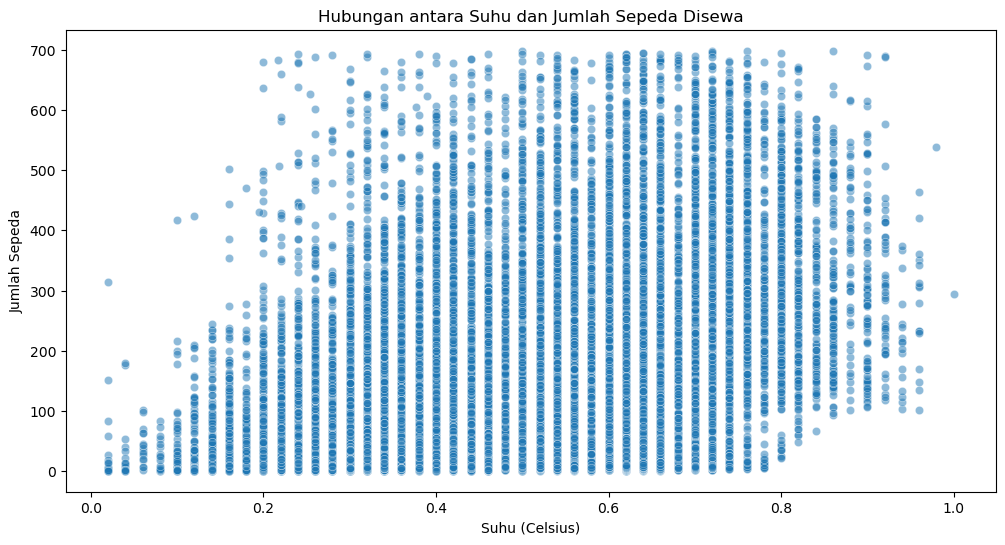

In [37]:
# Scatter plot untuk suhu dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Suhu dan Jumlah Sepeda Disewa')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda')
plt.show()

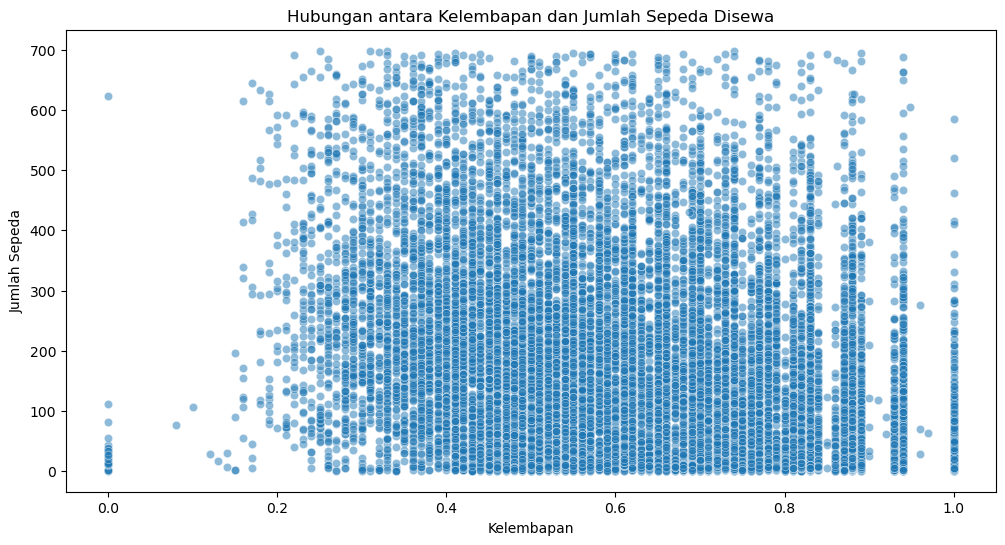

In [38]:
# Scatter plot untuk kelembapan dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Kelembapan dan Jumlah Sepeda Disewa')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Sepeda')
plt.show()

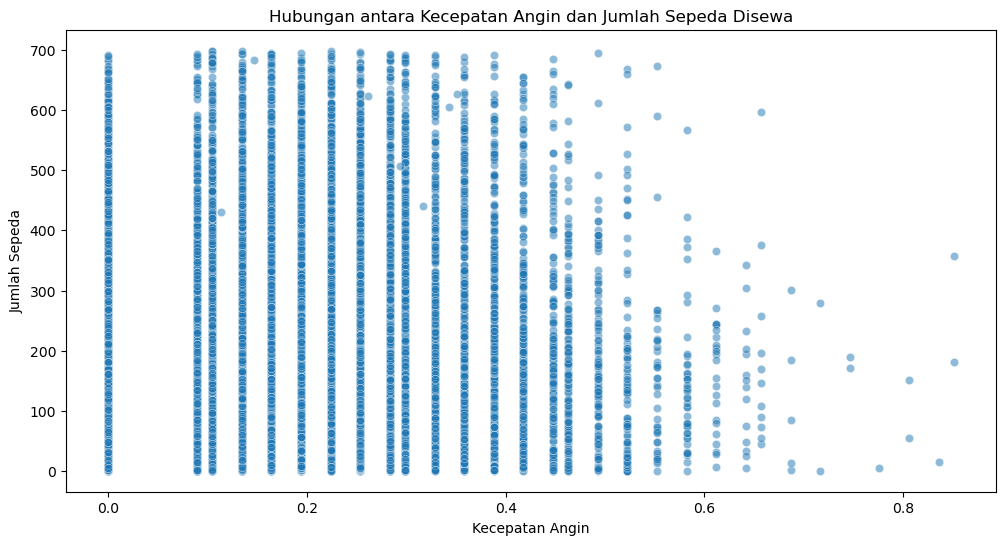

In [39]:
# Scatter plot untuk kecepatan angin dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Sepeda Disewa')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda')
plt.show()

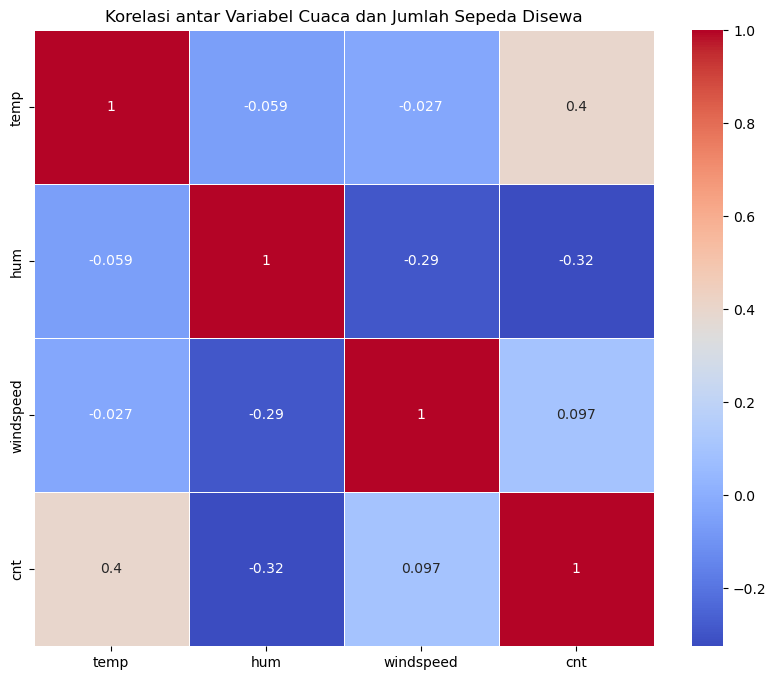

In [40]:
# Korelasi antar variabel numerik
correlation_matrix = df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel Cuaca dan Jumlah Sepeda Disewa')
plt.show()

Mean Squared Error: 19817.85437924646
R-squared (R2): 0.25605796025104544


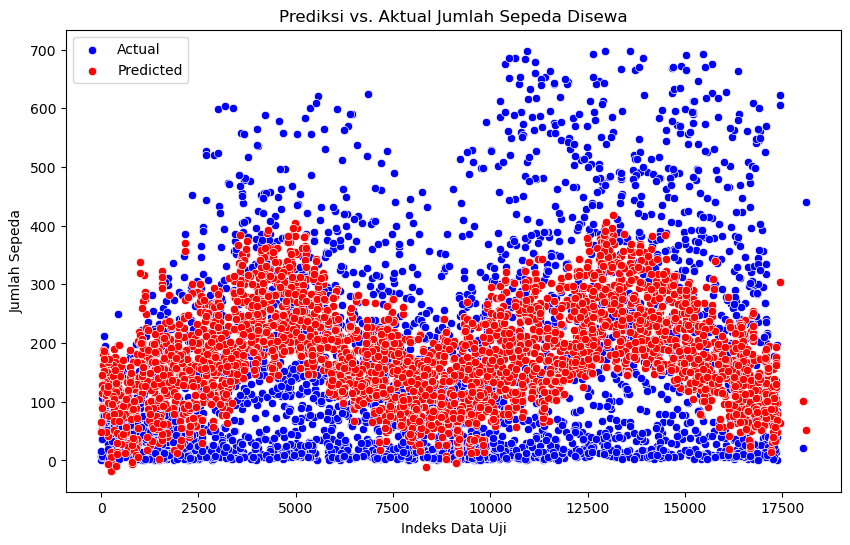

In [48]:
# Memilih fitur-fitur yang akan digunakan untuk prediksi
features = ['temp', 'hum', 'windspeed']

# Memisahkan variabel independen (X) dan dependen (y)
X = df[features]
y = df['cnt']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Mengukur akurasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualisasi prediksi vs. aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual', color='blue')
sns.scatterplot(x=y_test.index, y=y_pred, label='Predicted', color='red')
plt.title('Prediksi vs. Aktual Jumlah Sepeda Disewa')
plt.xlabel('Indeks Data Uji')
plt.ylabel('Jumlah Sepeda')
plt.legend()
plt.show()